<a href="https://colab.research.google.com/github/JesunAhmadUshno/Data-Analytics-Case-Study/blob/main/time_series_airline_passengers_dataset_using_stl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

In [ ]:
#Read a time series dataset, this is the airline passengers dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
passengers_time_series = pd.read_csv(url)

In [ ]:
print (passengers_time_series)

       Month  Passengers
0    1949-01         112
1    1949-02         118
2    1949-03         132
3    1949-04         129
4    1949-05         121
..       ...         ...
139  1960-08         606
140  1960-09         508
141  1960-10         461
142  1960-11         390
143  1960-12         432

[144 rows x 2 columns]


In [ ]:
passengers_time_series['Month']=pd.to_datetime(passengers_time_series['Month'])
passengers_time_series.set_index('Month',inplace=True)

In [ ]:
#Extract the series
series = passengers_time_series['Passengers']

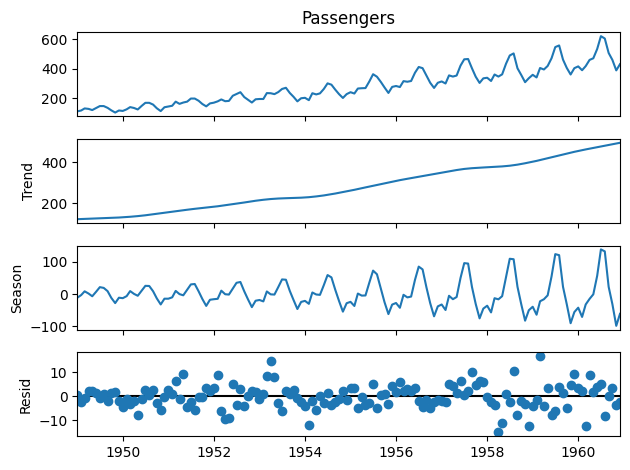

In [ ]:
# Apply STL decomposition with a period of 12 (assuming monthly data)
stl = STL(series, period=12)
result = stl.fit()

# Plot the decomposed components
fig = result.plot()
plt.show()

In [ ]:
# The plot shows the results of the Seasonal-Trend decomposition using Loess (STL) method applied to the airline passengers time series data. It breaks down the original time series into three components:

# Observed: This is the original time series data as it was recorded. You can see the overall upward trend and the recurring seasonal pattern.
# Trend: This component represents the underlying long-term movement in the data, smoothing out the seasonal and irregular fluctuations. In this plot, you can see a clear increasing trend in the number of airline passengers over the years.
# Seasonal: This component captures the repeating patterns in the data that occur at fixed intervals (in this case, monthly). You can see a consistent yearly pattern with peaks and troughs.
# Residual: This component is what remains after subtracting the trend and seasonal components from the observed data. It represents the irregular or random fluctuations in the time series that are not explained by the trend or seasonality. Ideally, the residuals should look like random noise.
# These components help us to understand the different factors that contribute to the overall time series pattern.

In [ ]:
passengers_time_series = passengers_time_series.reset_index()

Implementation of Expotential Smotthing (Holt-Winters Method)

In [ ]:
#import the library
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
#split data into training and test sets
prediction_length=60
train_df=passengers_time_series.iloc[:len(passengers_time_series)-prediction_length]
test_df=passengers_time_series.iloc[:len(passengers_time_series)-prediction_length]

In [ ]:
# Apply Holt-Winters Exponential Smoothing (multiplicative method)
model_multiplicative = ExponentialSmoothing(train_df['Passengers'],
                                          seasonal='mul',
                                          seasonal_periods=12,
                                          trend='add').fit()
forecast_multiplicative = model_multiplicative.forecast(len(test_df))

In [ ]:
# Apply Holt-Winters Exponential Smoothing (additive method)
model_additive = ExponentialSmoothing(train_df['Passengers'],
                                    seasonal='add',
                                    seasonal_periods=12,
                                    trend='add').fit()
forecast_additive = model_additive.forecast(len(test_df))

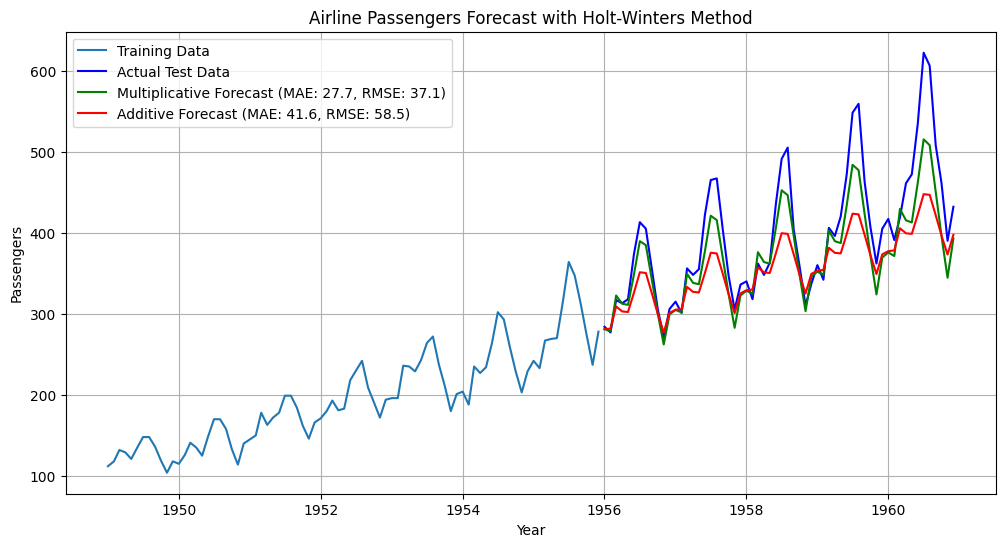


Multiplicative Model Summary:
                       ExponentialSmoothing Model Results                       
Dep. Variable:               Passengers   No. Observations:                   84
Model:             ExponentialSmoothing   SSE                           3966.339
Optimized:                         True   AIC                            355.802
Trend:                         Additive   BIC                            394.695
Seasonal:                Multiplicative   AICC                           366.325
Seasonal Periods:                    12   Date:                 Wed, 11 Jun 2025
Box-Cox:                          False   Time:                         20:19:57
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.6947703                alpha                

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Read and prepare the data
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
passengers = pd.read_csv(url)

# Convert Month to datetime and set as index
passengers['Month'] = pd.to_datetime(passengers['Month'])
passengers.set_index('Month', inplace=True)
series = passengers['Passengers']

# Set the frequency explicitly to avoid warnings
series = series.asfreq('MS')  # MS = Month Start

# Split data into training and test sets (last 5 years for testing)
test_size = 60  # 5 years of monthly data
train = series.iloc[:-test_size]
test = series.iloc[-test_size:]

# Fit Holt-Winters models
# Multiplicative model (better for this data with increasing seasonal variation)
model_mul = ExponentialSmoothing(train,
                               trend='add',
                               seasonal='mul',
                               seasonal_periods=12).fit()

# Additive model (for comparison)
model_add = ExponentialSmoothing(train,
                               trend='add',
                               seasonal='add',
                               seasonal_periods=12).fit()

# Generate forecasts
forecast_mul = model_mul.forecast(test_size)
forecast_add = model_add.forecast(test_size)

# Calculate model performance metrics
def calculate_metrics(actual, forecast):
    mae = (actual - forecast).abs().mean()
    mse = ((actual - forecast)**2).mean()
    rmse = mse**0.5
    return mae, rmse

mae_mul, rmse_mul = calculate_metrics(test, forecast_mul)
mae_add, rmse_add = calculate_metrics(test, forecast_add)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Test Data', color='blue')
plt.plot(test.index, forecast_mul, label=f'Multiplicative Forecast (MAE: {mae_mul:.1f}, RMSE: {rmse_mul:.1f})', color='green')
plt.plot(test.index, forecast_add, label=f'Additive Forecast (MAE: {mae_add:.1f}, RMSE: {rmse_add:.1f})', color='red')
plt.title('Airline Passengers Forecast with Holt-Winters Method')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()

# Print model summaries
print("\nMultiplicative Model Summary:")
print(model_mul.summary())

print("\nAdditive Model Summary:")
print(model_add.summary())